In [1]:
from pandas_datareader import data

df = data.get_data_yahoo("SPY")


In [2]:
df[:8]

High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-04  113.389999  111.510002  112.370003  113.330002  118944600.0   
2010-01-05  113.680000  112.849998  113.260002  113.629997  111579900.0   
2010-01-06  113.989998  113.430000  113.519997  113.709999  116074400.0   
2010-01-07  114.330002  113.180000  113.500000  114.190002  131091100.0   
2010-01-08  114.620003  113.660004  113.889999  114.570000  126402800.0   
2010-01-11  115.129997  114.239998  115.080002  114.730003  106375700.0   
2010-01-12  114.209999  113.220001  113.970001  113.660004  163333500.0   
2010-01-13  114.940002  113.370003  113.949997  114.620003  161822000.0   

            Adj Close  
Date                   
2010-01-04  93.675255  
2010-01-05  93.923264  
2010-01-06  93.989372  
2010-01-07  94.386131  
2010-01-08  94.700233  
2010-01-11  94.832474  
2010-01-12  93.948036  
2010-01-13  94.741554

In [3]:
df['return'] = df['High'].pct_change().fillna(0)

In [4]:
import pandas_montecarlo
mc = df['return'].montecarlo(sims=5, bust=-1, goal=1)

In [5]:
mc

<pandas_montecarlo.montecarlo.<locals>.__make_object__ at 0x106a54c18>

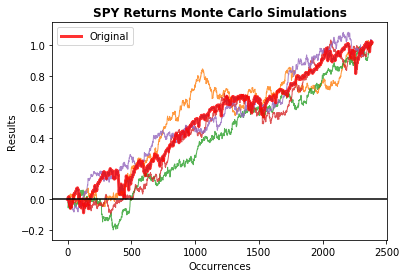

In [6]:
mc.plot(title="SPY Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

In [7]:
mc.stats

{'min': 1.0182182747570563,
 'max': 1.0182182747570574,
 'mean': 1.0182182747570567,
 'median': 1.0182182747570567,
 'std': 4.577566798522237e-16,
 'maxdd': -0.19783033375171566,
 'bust': 0.0,
 'goal': 1.0}

In [8]:
mc.maxdd

{'min': -0.19783033375171566,
 'max': -0.04636264714166882,
 'mean': -0.1016199544973984,
 'median': -0.08685912425241704,
 'std': 0.05691666434190549}

In [9]:
mc.data.head()

original         1         2         3         4
0  0.000000 -0.008523 -0.005743 -0.004115 -0.001871
1  0.002558  0.001112 -0.000555  0.002970 -0.000185
2  0.002727 -0.000185 -0.002175 -0.007503 -0.005613
3  0.002983  0.001951 -0.022295 -0.004974  0.003340
4  0.002537  0.002158 -0.023605 -0.009148 -0.005355

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

In [12]:
%matplotlib inline
plt.hist(data)

(array([100061., 100096., 100247.,  99852., 100072.,  99965., 100192.,
         99934.,  99920.,  99661.]),
 array([ 1.00017652, 10.90014893, 20.80012134, 30.70009375, 40.60006615,
        50.50003856, 60.40001097, 70.29998337, 80.19995578, 90.09992819,
        99.9999006 ]),
 <a list of 10 Patch objects>)

In [13]:
data = np.random.randn(1000000)

In [55]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.27000e+02, 3.21800e+03, 3.55430e+04, 1.69380e+05, 3.46986e+05,
        3.06442e+05, 1.17531e+05, 1.94270e+04, 1.29900e+03, 4.70000e+01]),
 array([-4.61069401, -3.66085278, -2.71101156, -1.76117033, -0.8113291 ,
         0.13851212,  1.08835335,  2.03819458,  2.9880358 ,  3.93787703,
         4.88771826]),
 <a list of 10 Patch objects>)

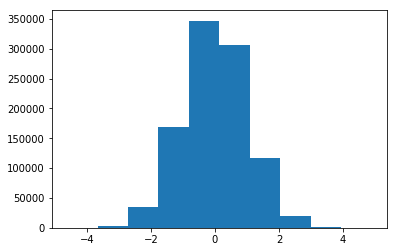

In [56]:
%matplotlib inline
plt.hist(data)

# MONTE CARLO

In [58]:

def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14023


(3.14023, [<matplotlib.lines.Line2D at 0x121f3a358>])

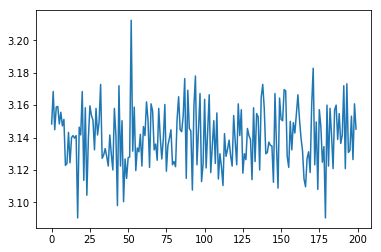

In [60]:
pi_montecarlo(10000, 200)

In [62]:

n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [63]:
data.describe()

A               B               C
count  1000000.000000  1000000.000000  1000000.000000
mean        -0.000780        1.498901       18.501572
std          1.000025        2.499232        7.791143
min         -5.107974      -11.247580        5.000010
25%         -0.675864       -0.185462       11.768576
50%         -0.001842        1.497171       18.497630
75%          0.674624        3.184353       25.253057
max          4.784243       13.034198       31.999976

# DATASET

In [65]:
import numpy as np
import pandas as pd

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

In [15]:
plt.style.use("ggplot")


In [16]:
# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 100000

In [17]:
# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 1100.62it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 402000/402000 [01:10<00:00, 5685.61draws/s]
The number of effective samples is smaller than 25% for some parameters.


/Users/oscarmendezaguirre/venv/upn_tesis_m/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


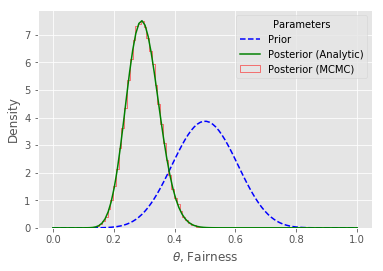

In [18]:
# Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta"], bins, 
    histtype="step", normed=True, 
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()